In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({"font.size": 16})
default_cycle_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
print(default_cycle_colors)

from cycler import cycler
import numpy as np

import lal
import lalsimulation as lalsim

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [2]:
import utils

## GPR imports

In [3]:
# import pymc3 as pm

In [4]:
# import arviz as az

In [5]:
import tensorflow as tf

In [6]:
import tensorflow_probability as tfp
tfd = tfp.distributions

# match function

In [7]:
def match(h1, h2, times):

    dt = times[1] - times[0]
    n = len(times)
    df = 1.0/(n*dt)
    norm = 4. * df

    h1_fft = np.fft.fft(h1)
    h2_fft = np.fft.fft(h2)

    h1h1_sq = np.vdot(h1_fft, h1_fft) * norm
    h2h2_sq = np.vdot(h2_fft, h2_fft) * norm

    h1h1 = dt * np.sqrt(h1h1_sq)
    h2h2 = dt * np.sqrt(h2h2_sq)

    ifft = np.fft.ifft(np.conj(h1_fft) * h2_fft)

    ts = ifft / h1h1 / h2h2 * 4 * dt
    m = np.max(np.abs(ts))

    return m

# load NR waveforms

In [8]:
import glob
import os

In [9]:
# root_dir = "/Users/spx8sk/work/data"
# root_dir = "/Volumes/ancient/mirror/machines/CU_mbp/work/data"
root_dir = "/Users/sebastian.khan/personal/data"

In [10]:
# get data
nrfiles_single_res = dict(
    q1=os.path.join(root_dir, "SXS_BBH_0180_Res4.h5"),
    q2=os.path.join(root_dir, "SXS_BBH_0169_Res5.h5"),
    q4=os.path.join(root_dir, "SXS_BBH_0167_Res5.h5"),
    q5=os.path.join(root_dir, "SXS_BBH_0107_Res5.h5"),
    q10=os.path.join(root_dir, "SXS_BBH_0303_Res5.h5"),
    q18=os.path.join(root_dir, "q18a0a0c025_144-22-hybrid.h5"),
)

In [11]:
def make_nr_dict(root_dir):
    """
    makes a dictionary of paths to NR files
    with multiple resolutions
    """
    nr_ids = dict(q1="180", q2="169", q4="167", q5="107", q10="303")

    nrfiles = {}

    for key, val in nr_ids.items():
        ps = glob.glob(os.path.join(root_dir, "*" + val + "*.h5"))

        nrfiles.update({key: {}})
        for p in ps:
            k = p.split("/")[-1].split(".h5")[0].split("_")[-1]
            nrfiles[key].update({k: p})

    return nrfiles

In [12]:
nrfiles = make_nr_dict(root_dir)

In [13]:
nrfiles

{'q1': {'Res4': '/Users/sebastian.khan/personal/data/SXS_BBH_0180_Res4.h5',
  'Res3': '/Users/sebastian.khan/personal/data/SXS_BBH_0180_Res3.h5',
  'Res2': '/Users/sebastian.khan/personal/data/SXS_BBH_0180_Res2.h5'},
 'q2': {'Res3': '/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res3.h5',
  'Res5': '/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res5.h5',
  'Res4': '/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res4.h5'},
 'q4': {'Res5': '/Users/sebastian.khan/personal/data/SXS_BBH_0167_Res5.h5',
  'Res3': '/Users/sebastian.khan/personal/data/SXS_BBH_0167_Res3.h5'},
 'q5': {'Res4': '/Users/sebastian.khan/personal/data/SXS_BBH_0107_Res4.h5',
  'Res5': '/Users/sebastian.khan/personal/data/SXS_BBH_0107_Res5.h5',
  'Res3': '/Users/sebastian.khan/personal/data/SXS_BBH_0107_Res3.h5'},
 'q10': {'Res4': '/Users/sebastian.khan/personal/data/SXS_BBH_0303_Res4.h5',
  'Res5': '/Users/sebastian.khan/personal/data/SXS_BBH_0303_Res5.h5',
  'Res3': '/Users/sebastian.khan/personal/data/SXS_BBH_

In [14]:
nrfiles_single_res

{'q1': '/Users/sebastian.khan/personal/data/SXS_BBH_0180_Res4.h5',
 'q2': '/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res5.h5',
 'q4': '/Users/sebastian.khan/personal/data/SXS_BBH_0167_Res5.h5',
 'q5': '/Users/sebastian.khan/personal/data/SXS_BBH_0107_Res5.h5',
 'q10': '/Users/sebastian.khan/personal/data/SXS_BBH_0303_Res5.h5',
 'q18': '/Users/sebastian.khan/personal/data/q18a0a0c025_144-22-hybrid.h5'}

## example waveform generation

In [15]:
wg0 = utils.WaveformGeneration(nrfile=nrfiles_single_res["q18"])
wg1 = utils.WaveformGeneration(approximant=lalsim.SEOBNRv4, q=18)
wg2 = utils.WaveformGeneration(approximant=lalsim.IMRPhenomD, q=18)
wg3 = utils.WaveformGeneration(approximant=lalsim.IMRPhenomC, q=18)
wg4 = utils.WaveformGeneration(approximant=lalsim.IMRPhenomB, q=18)

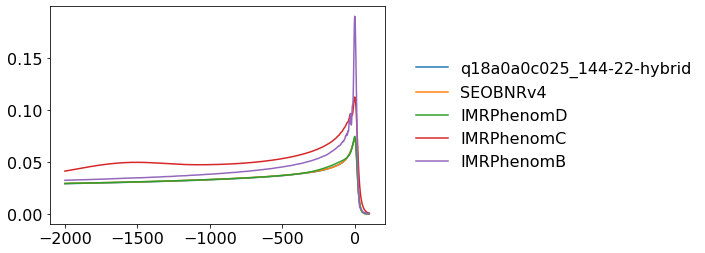

In [16]:
plt.figure()
for wg in [wg0, wg1, wg2, wg3, wg4]:
    plt.plot(wg.times, wg.amp, label=wg.label)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))
# plt.xlim(-100,100)
# plt.yscale('log')

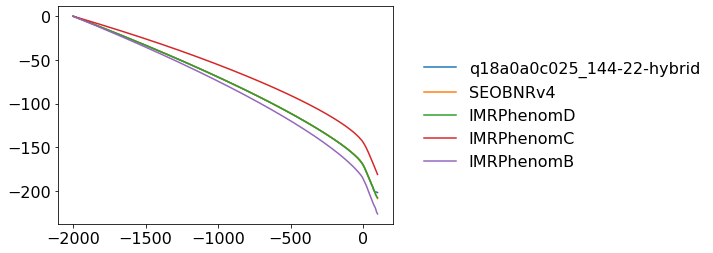

In [17]:
plt.figure()
for wg in [wg0, wg1, wg2, wg3, wg4]:
    plt.plot(wg.times, wg.phase, label=wg.label)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))
# plt.xlim(-100,100)
# plt.yscale('log')

(-0.6, 0.0)

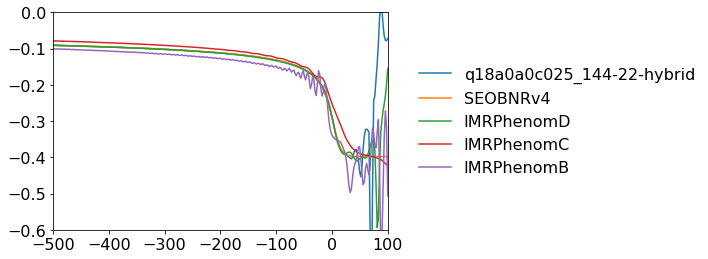

In [18]:
plt.figure()
for wg in [wg0, wg1, wg2, wg3, wg4]:
    plt.plot(wg.times, wg.freq, label=wg.label)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))
plt.xlim(-500,100)
plt.ylim(-0.6, 0)
# plt.yscale('log')

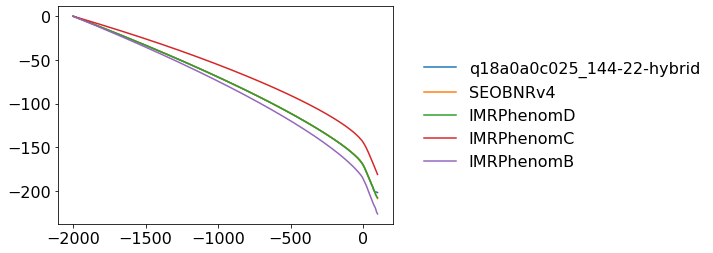

In [19]:
plt.figure()
for wg in [wg0, wg1, wg2, wg3, wg4]:
    plt.plot(wg.times, np.unwrap(np.angle(wg.h22)), label=wg.label)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

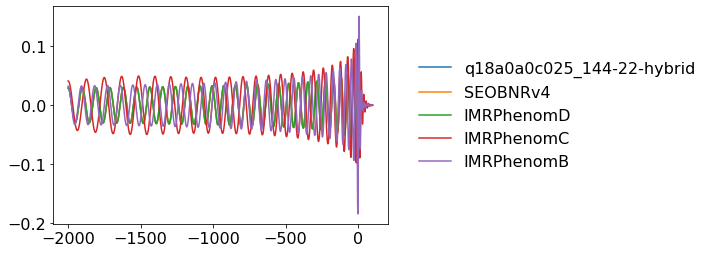

In [20]:
plt.figure()
for wg in [wg0, wg1, wg2, wg3, wg4]:
    plt.plot(wg.times, wg.Reh22, label=wg.label)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))

# generate NR data

In [21]:
npts=1000

In [120]:
nrfiles

{'q1': {'Res4': '/Users/sebastian.khan/personal/data/SXS_BBH_0180_Res4.h5',
  'Res3': '/Users/sebastian.khan/personal/data/SXS_BBH_0180_Res3.h5',
  'Res2': '/Users/sebastian.khan/personal/data/SXS_BBH_0180_Res2.h5'},
 'q2': {'Res3': '/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res3.h5',
  'Res5': '/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res5.h5',
  'Res4': '/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res4.h5'},
 'q4': {'Res5': '/Users/sebastian.khan/personal/data/SXS_BBH_0167_Res5.h5',
  'Res3': '/Users/sebastian.khan/personal/data/SXS_BBH_0167_Res3.h5'},
 'q5': {'Res4': '/Users/sebastian.khan/personal/data/SXS_BBH_0107_Res4.h5',
  'Res5': '/Users/sebastian.khan/personal/data/SXS_BBH_0107_Res5.h5',
  'Res3': '/Users/sebastian.khan/personal/data/SXS_BBH_0107_Res3.h5'},
 'q10': {'Res4': '/Users/sebastian.khan/personal/data/SXS_BBH_0303_Res4.h5',
  'Res5': '/Users/sebastian.khan/personal/data/SXS_BBH_0303_Res5.h5',
  'Res3': '/Users/sebastian.khan/personal/data/SXS_BBH_

In [97]:
nrfiles['q2']

{'Res3': '/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res3.h5',
 'Res5': '/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res5.h5',
 'Res4': '/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res4.h5'}

In [143]:
# NR_wfs = [utils.WaveformGeneration(nrfile=nrfiles_single_res[key], npts=npts) for key in nrfiles_single_res]
NR_wfs = [utils.WaveformGeneration(nrfile=nrfiles['q1'][key], npts=npts) for key in nrfiles['q1']]

In [144]:
# NR_wfs=[]
# for key in nrfiles.keys():
#     for skey in nrfiles[key].keys():
#         NR_wfs.append(utils.WaveformGeneration(nrfile=nrfiles[key][skey], npts=npts))
        
# NR_wfs.append(utils.WaveformGeneration(nrfile=nrfiles_single_res['q18'], npts=npts))

In [145]:
len(NR_wfs)

3

In [146]:
[NR.q for NR in NR_wfs]

[1.0, 1.0, 1.0]

In [147]:
nr_q_arr = np.array([wg.q for wg in NR_wfs])

# generate modelA and modelB waveforms

In [148]:
# q_min = 1
# max NR mass-ratio we have right now is 18
# q_max = 18
# q_max = 19
# q_npts = 100
# dq = 0.2

# dq=0.1
# q_random = np.random.uniform(q_min+dq, q_max-dq, q_npts)
# q_same_as_nr = np.array([1,2,4,5,10,18])
# q_arr = np.concatenate((q_same_as_nr, q_random))

# q_arr = np.linspace(q_min, q_max, q_npts)

# q_arr = np.arange(q_min, q_max, dq)

In [149]:
# q_arr.shape

In [150]:
q_arr = np.array([1.0])

In [151]:
def gen_model_waveforms(approx, qlist, npts):
    lal_approx = lalsim.GetApproximantFromString(approx)
    return [utils.WaveformGeneration(approximant=lal_approx, q=q, npts=npts) for q in qlist]

In [152]:
wf_model_names = ["SEOBNRv4_opt", "IMRPhenomD", "IMRPhenomC", "IMRPhenomB"]
model_wfs = {}
for wf_model_name in wf_model_names:
    print(f"working {wf_model_name}")
    model_wfs.update({
        wf_model_name:gen_model_waveforms(wf_model_name, q_arr, npts)
    })

working SEOBNRv4_opt
working IMRPhenomD
working IMRPhenomC
working IMRPhenomB


In [153]:
model_wfs.keys()

dict_keys(['SEOBNRv4_opt', 'IMRPhenomD', 'IMRPhenomC', 'IMRPhenomB'])

# comparison

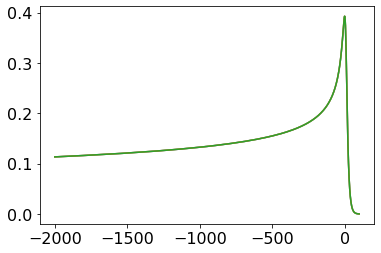

In [154]:
plt.plot(NR_wfs[0].times, NR_wfs[0].amp)
plt.plot(NR_wfs[1].times, NR_wfs[1].amp)
plt.plot(NR_wfs[2].times, NR_wfs[2].amp)

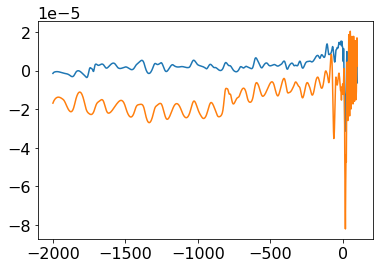

In [155]:
plt.plot(NR_wfs[0].times, NR_wfs[0].amp-NR_wfs[1].amp)
plt.plot(NR_wfs[0].times, NR_wfs[0].amp-NR_wfs[2].amp)

(0.1, 0.45)

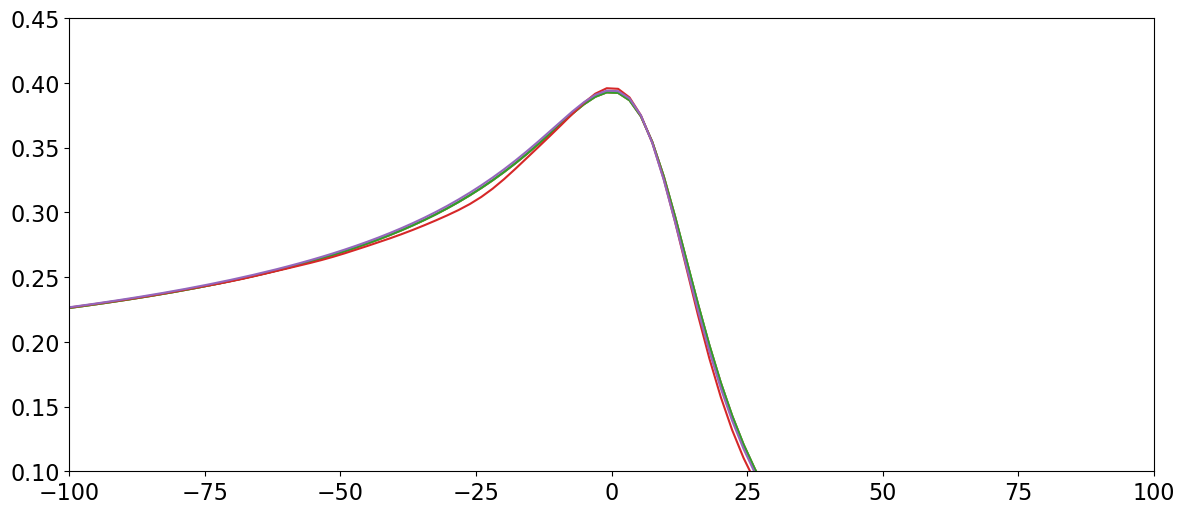

In [178]:
plt.figure(figsize=(14, 6), dpi=100)
plt.plot(NR_wfs[0].times, NR_wfs[0].amp)
plt.plot(NR_wfs[1].times, NR_wfs[1].amp)
plt.plot(NR_wfs[2].times, NR_wfs[2].amp)
plt.plot(model_wfs['IMRPhenomD'][0].times, model_wfs['IMRPhenomD'][0].amp)
plt.plot(model_wfs['SEOBNRv4_opt'][0].times, model_wfs['SEOBNRv4_opt'][0].amp)
plt.xlim(-100, 100)
plt.ylim(1e-1, 0.45)
# plt.yscale('log')

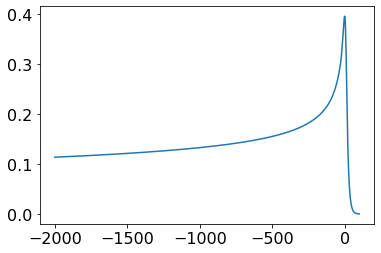

In [173]:
plt.plot(model_wfs['IMRPhenomD'][0].times, model_wfs['IMRPhenomD'][0].amp)

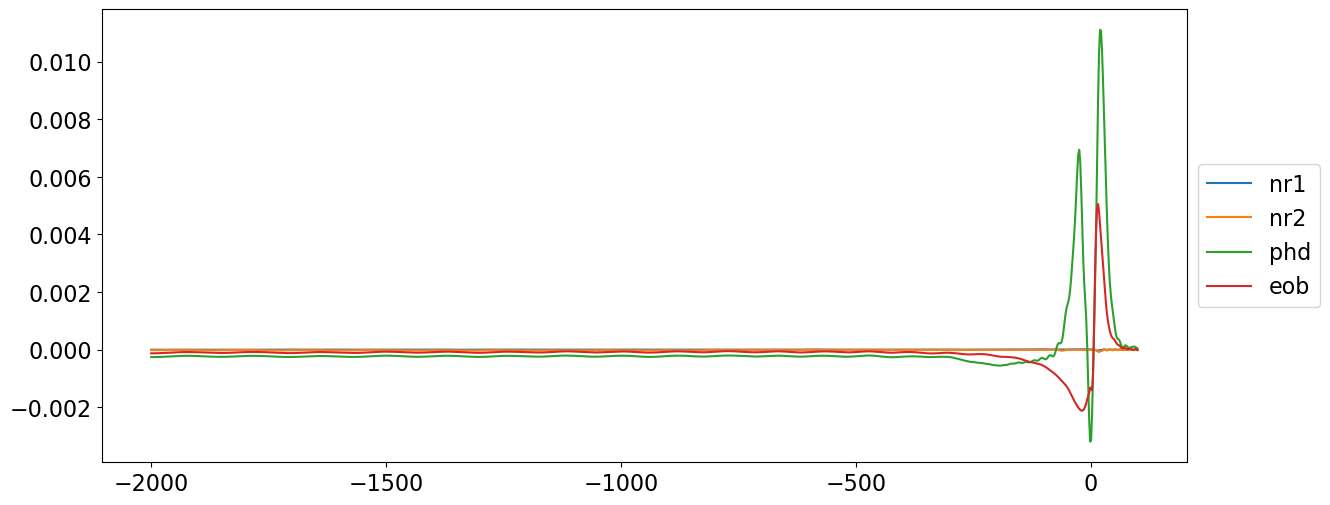

In [157]:
plt.figure(figsize=(14, 6), dpi=100)

plt.plot(NR_wfs[0].times, NR_wfs[0].amp-NR_wfs[1].amp, label='nr1')
plt.plot(NR_wfs[0].times, NR_wfs[0].amp-NR_wfs[2].amp, label='nr2')

# plt.plot(NR_wfs[0].times, NR_wfs[0].amp-model_wfs['IMRPhenomB'][0].amp, label='phb')
# plt.plot(NR_wfs[0].times, NR_wfs[0].amp-model_wfs['IMRPhenomC'][0].amp, label='phc')
plt.plot(NR_wfs[0].times, NR_wfs[0].amp-model_wfs['IMRPhenomD'][0].amp, label='phd')
plt.plot(NR_wfs[0].times, NR_wfs[0].amp-model_wfs['SEOBNRv4_opt'][0].amp, label='eob')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

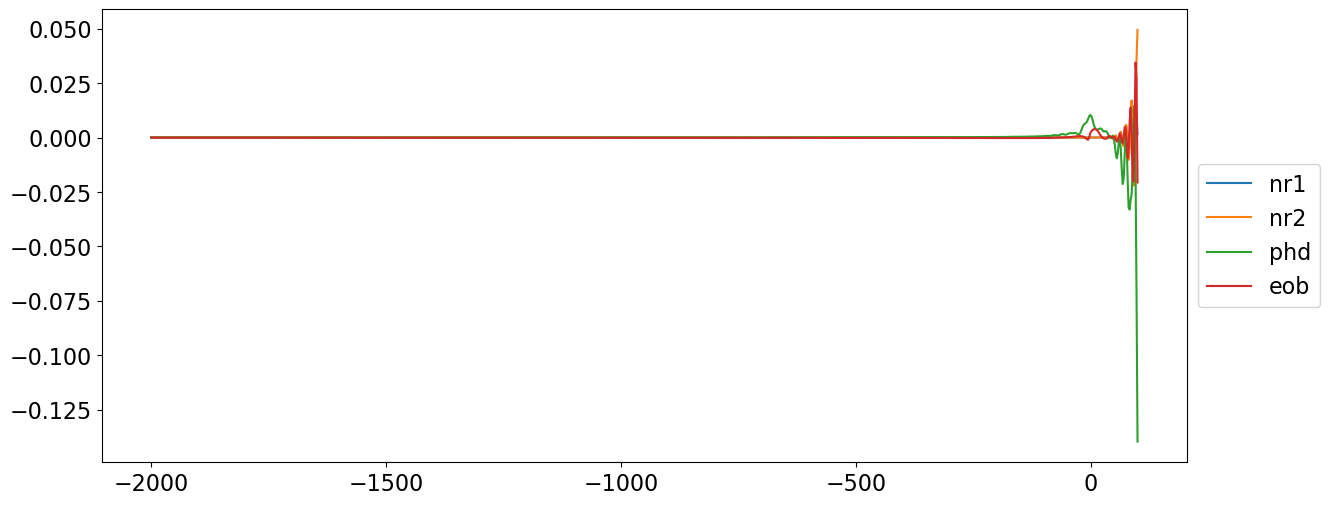

In [198]:
plt.figure(figsize=(14, 6), dpi=100)

plt.plot(NR_wfs[0].times, NR_wfs[0].freq-NR_wfs[1].freq, label='nr1')
plt.plot(NR_wfs[0].times, NR_wfs[0].freq-NR_wfs[2].freq, label='nr2')

# plt.plot(NR_wfs[0].times, NR_wfs[0].freq-model_wfs['IMRPhenomB'][0].freq, label='phb')
# plt.plot(NR_wfs[0].times, NR_wfs[0].freq-model_wfs['IMRPhenomC'][0].freq, label='phc')
plt.plot(NR_wfs[0].times, NR_wfs[0].freq-model_wfs['IMRPhenomD'][0].freq, label='phd')
plt.plot(NR_wfs[0].times, NR_wfs[0].freq-model_wfs['SEOBNRv4_opt'][0].freq, label='eob')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

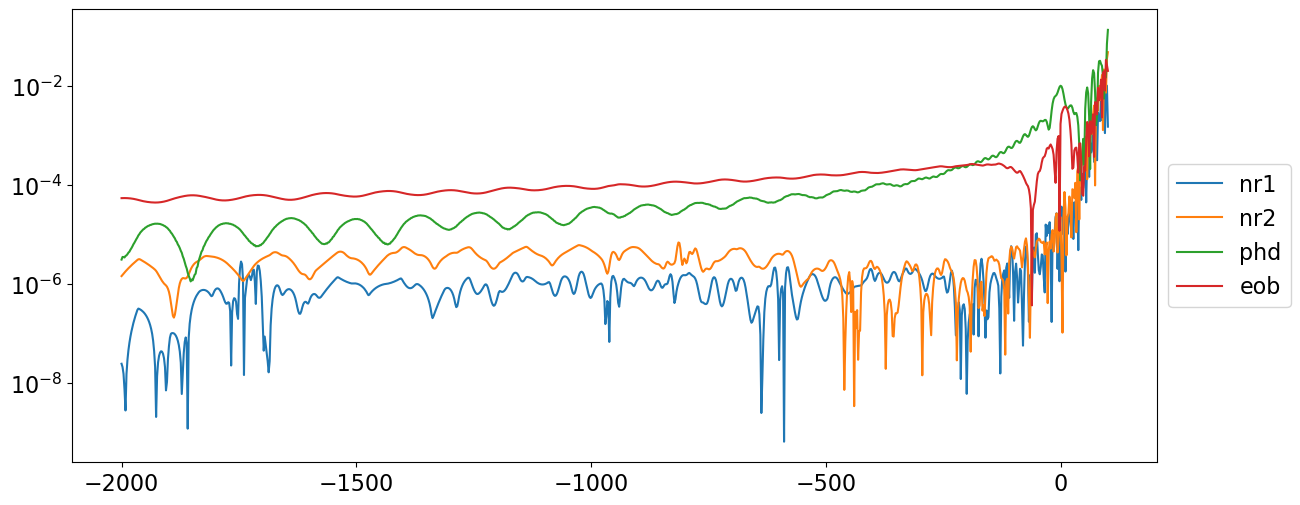

In [200]:
plt.figure(figsize=(14, 6), dpi=100)

plt.plot(NR_wfs[0].times, np.abs(NR_wfs[0].freq-NR_wfs[1].freq), label='nr1')
plt.plot(NR_wfs[0].times, np.abs(NR_wfs[0].freq-NR_wfs[2].freq), label='nr2')

# plt.plot(NR_wfs[0].times, np.abs(NR_wfs[0].freq-model_wfs['IMRPhenomB'][0].freq), label='phb')
# plt.plot(NR_wfs[0].times, np.abs(NR_wfs[0].freq-model_wfs['IMRPhenomC'][0].freq), label='phc')
plt.plot(NR_wfs[0].times, np.abs(NR_wfs[0].freq-model_wfs['IMRPhenomD'][0].freq), label='phd')
plt.plot(NR_wfs[0].times, np.abs(NR_wfs[0].freq-model_wfs['SEOBNRv4_opt'][0].freq), label='eob')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.yscale('log')